In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("Toyoto_Corrola.csv")

In [3]:
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
df.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


<Axes: xlabel='Age_08_04', ylabel='Price'>

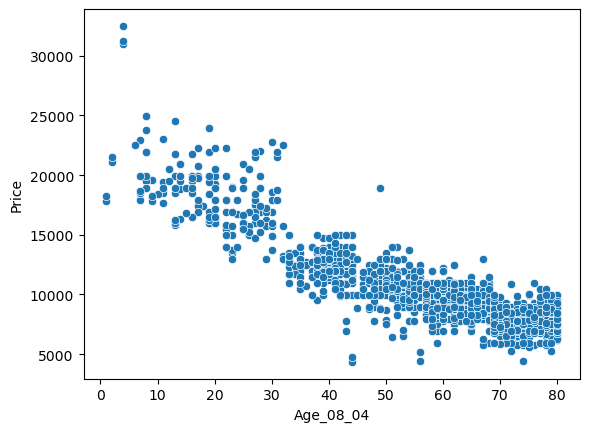

In [6]:
sns.scatterplot(x = df['Age_08_04'],y = df['Price']) 

here car's age and price are negative slop  it means age is increase price will dicrease .


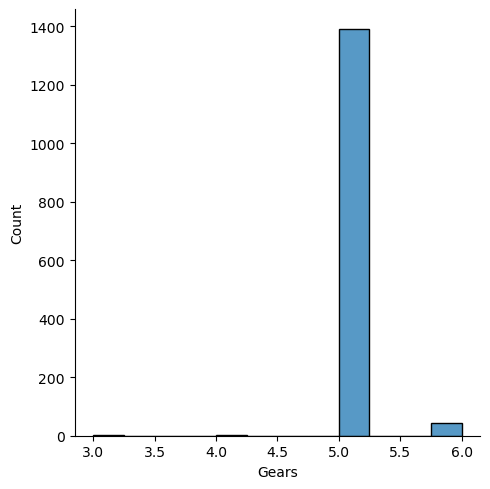

In [7]:
sns.displot(x = df['Gears']) 

<Axes: xlabel='Age_08_04', ylabel='Weight'>

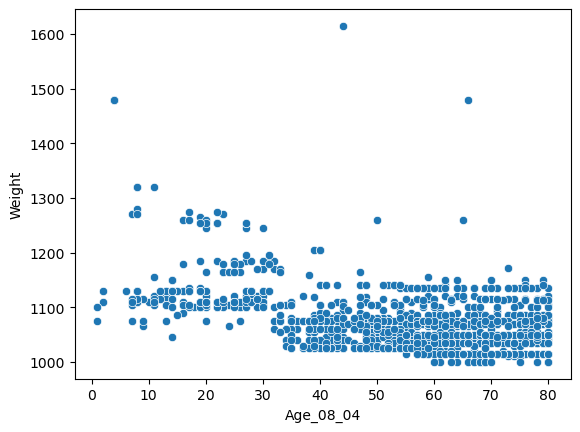

In [8]:
sns.scatterplot(x = df['Age_08_04'],y = df['Weight']) 

In [9]:
df['Cylinders'].unique()

array([4], dtype=int64)

<Axes: >

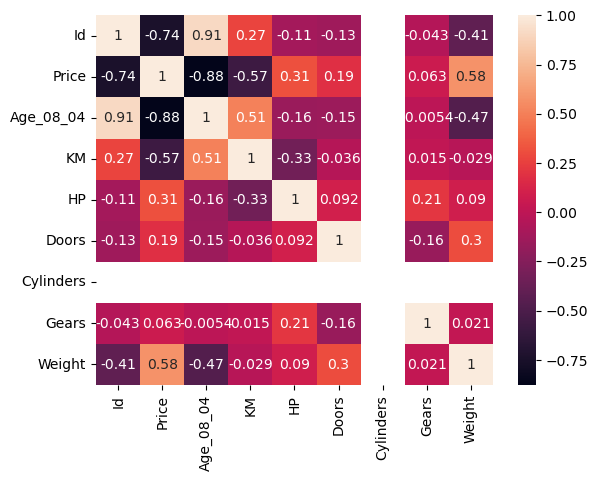

In [10]:
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True)

Relation between two variable

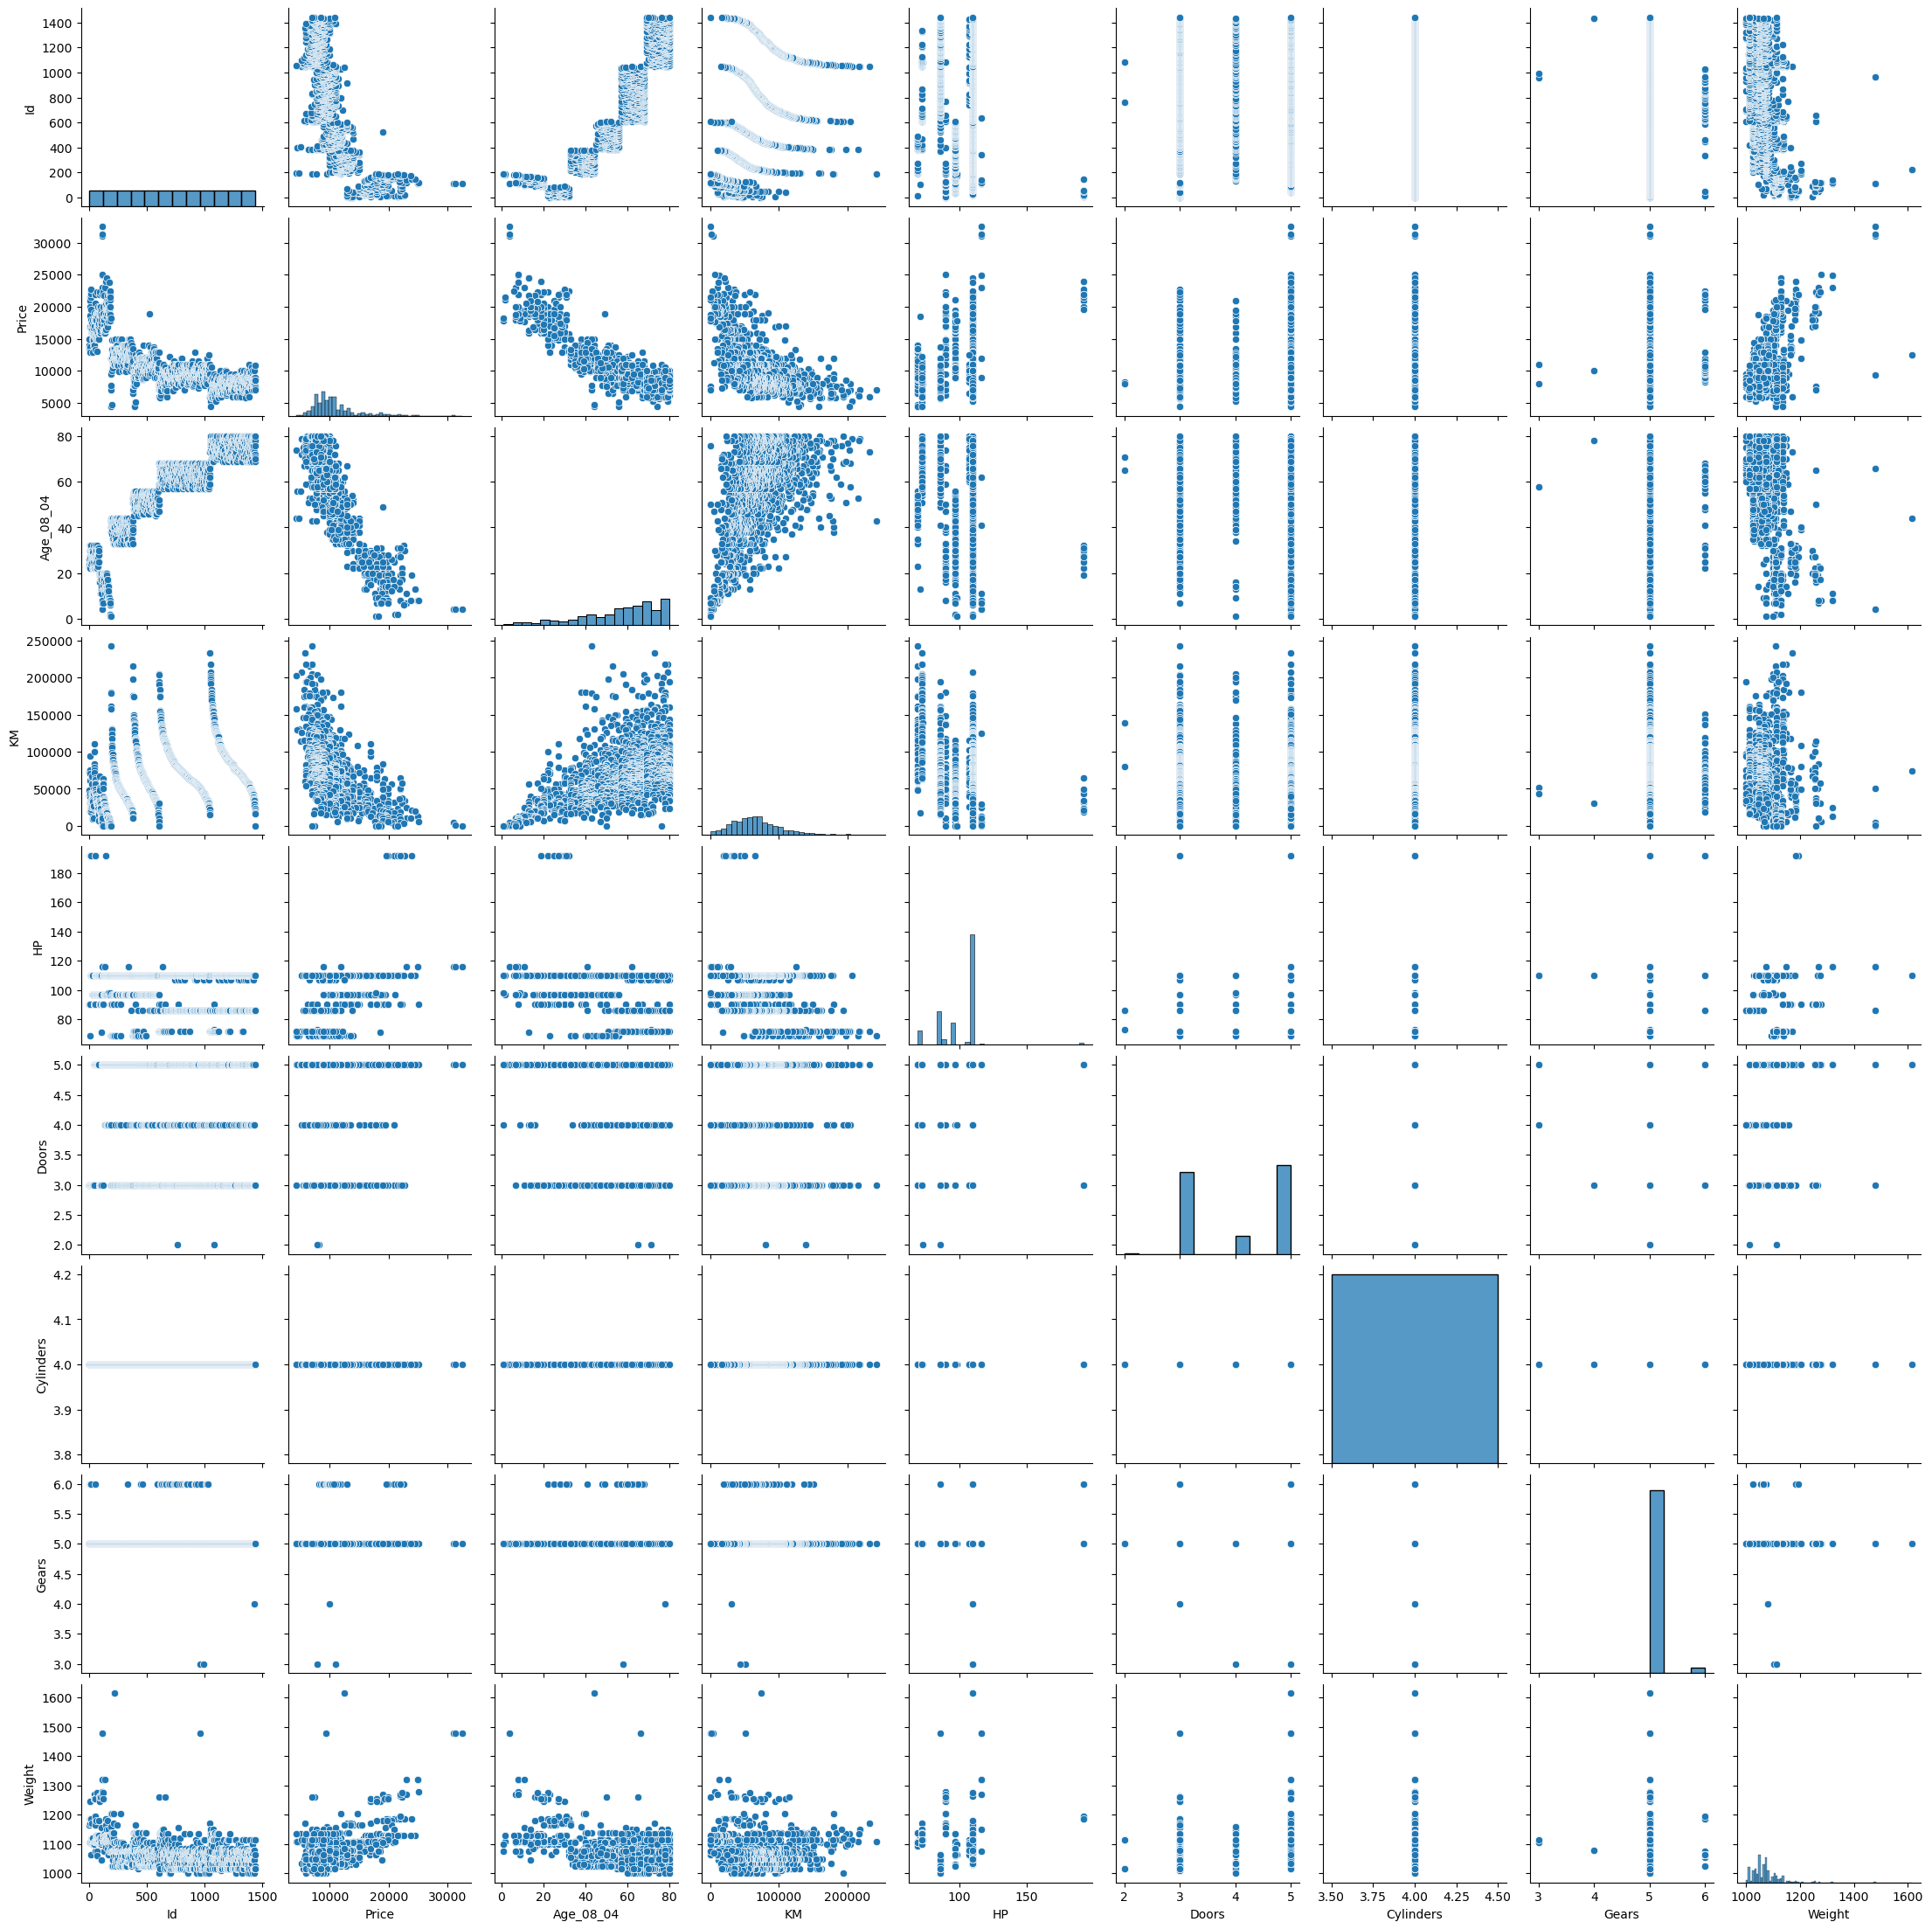

In [11]:
sns.pairplot(df)

#  preparing model

In [12]:
import statsmodels.formula.api as smf  
model1 = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:49:51   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Cylinders  -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     4.65e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
residuals = model1.resid
residuals

0      -3078.755590
1      -2309.895496
2      -2611.980869
3      -1241.755185
4      -2235.776031
           ...     
1431   -1265.538919
1432    2601.413757
1433      94.503764
1434   -1279.737838
1435   -3687.878866
Length: 1436, dtype: float64

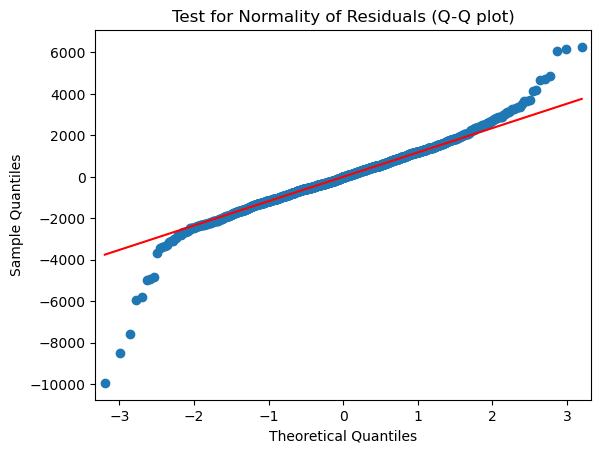

In [14]:
import statsmodels.api as sm
qqplot = sm.qqplot(residuals, line='q')
plt.title("Test for Normality of Residuals (Q-Q plot)")
plt.show()

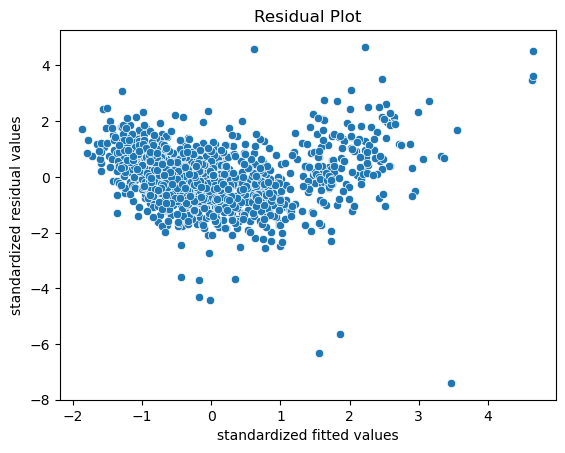

In [15]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

sns.scatterplot(x=get_standardized_values(model1.fittedvalues), y=get_standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

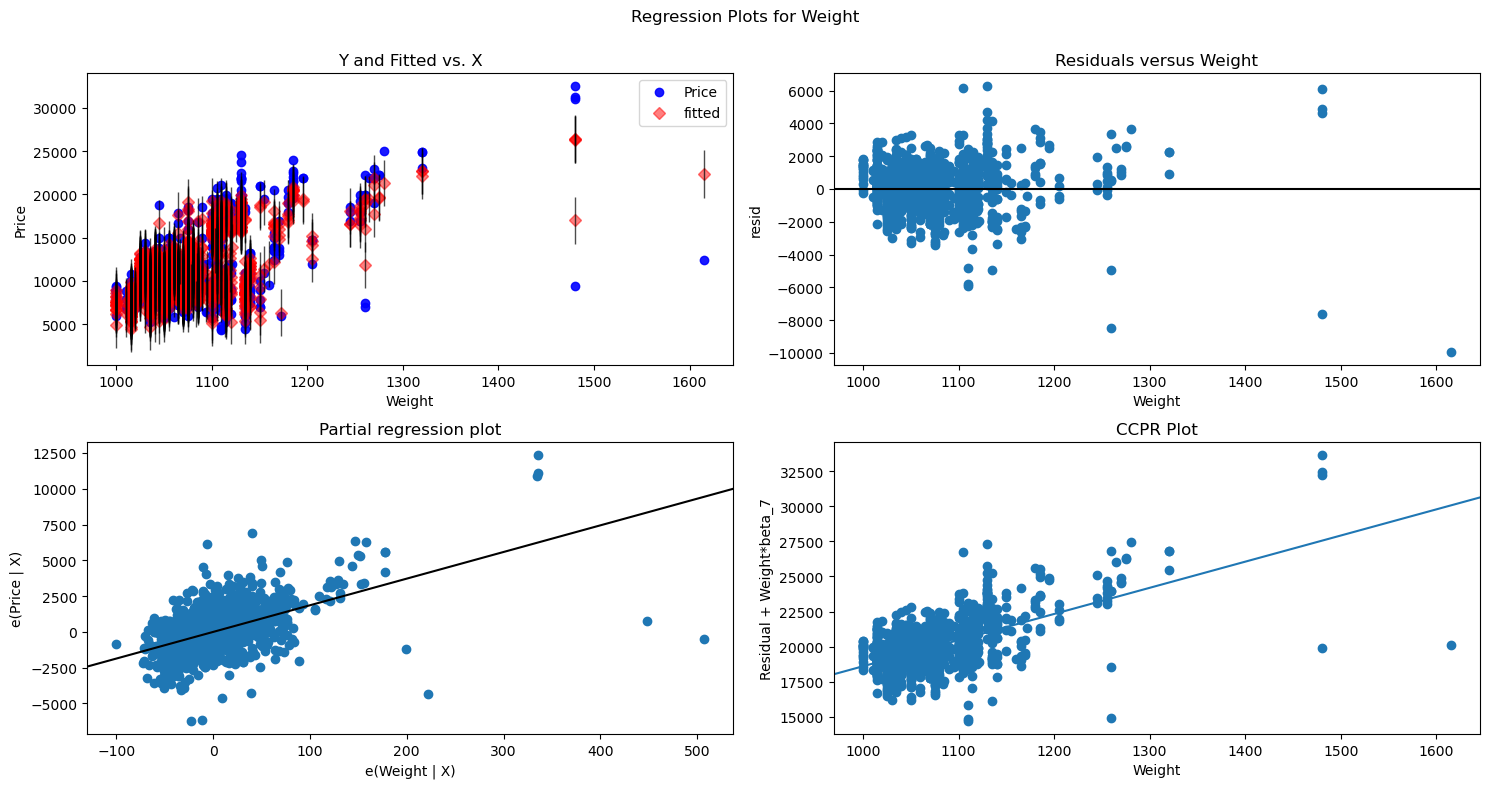

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

In [17]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

In [18]:
c

array([4.24724192e-03, 2.47586025e-03, 3.06355853e-03, ...,
       3.95661636e-06, 7.09835015e-04, 1.05319874e-02])

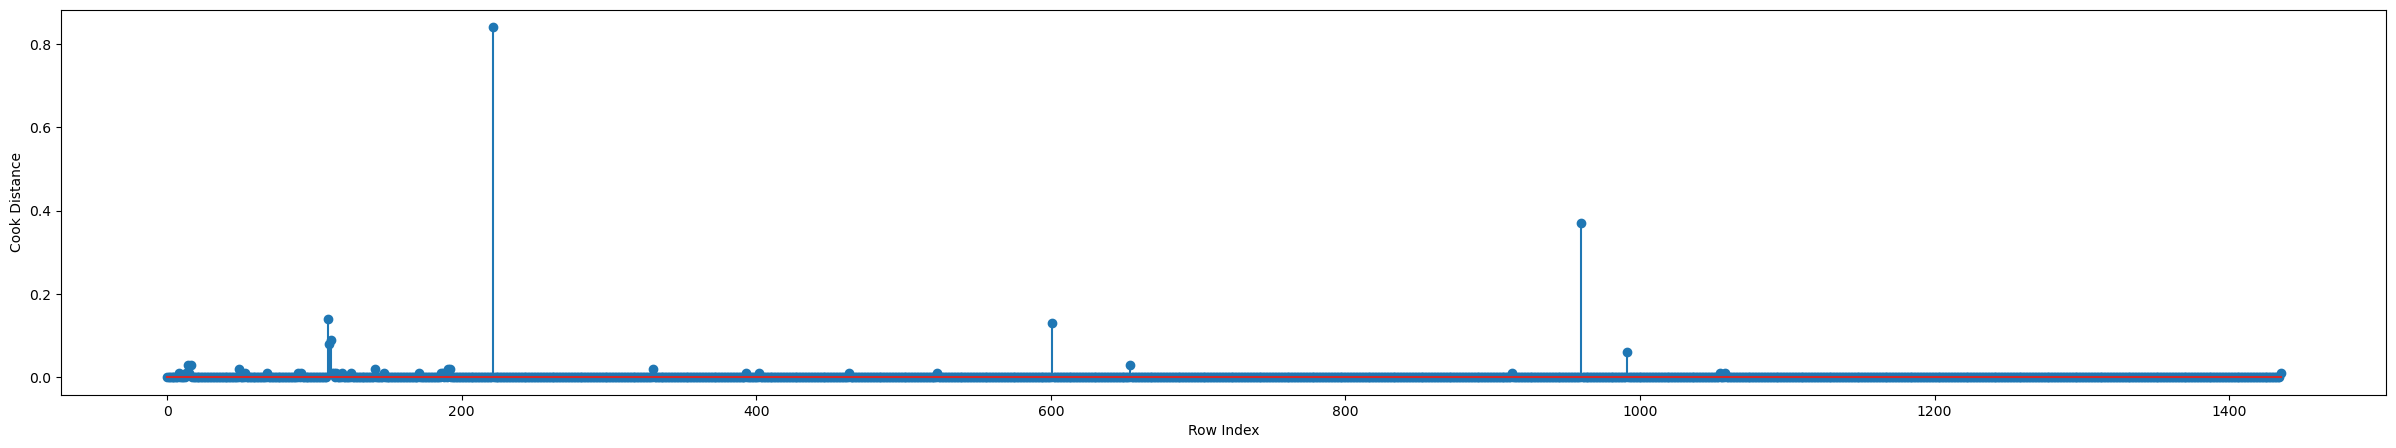

In [19]:
plt.figure(figsize=(30, 5))
plt.stem(np.arange(len(df)), np.round(c, 2))
plt.xlabel("Row Index")
plt.ylabel("Cook Distance")
plt.show()

In [20]:
np.argmax(c), np.max(c)

(221, 0.8359007508853545)

# High Influence Points

<function matplotlib.pyplot.show(close=None, block=None)>

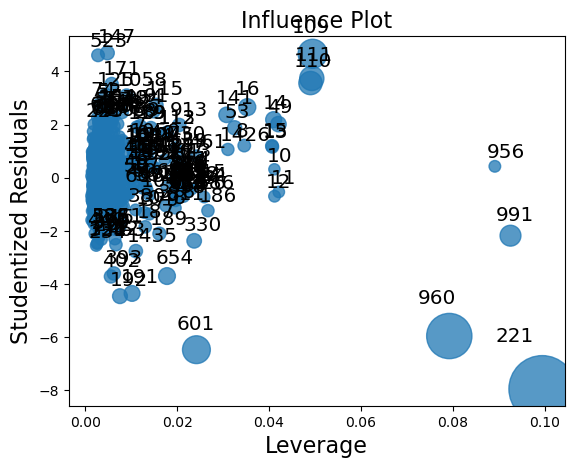

In [21]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show

# Predict for new data

In [22]:
new_data=pd.DataFrame({'Age_08_04': 12,'KM': 45000,'HP': 100,'Doors': 3,'Cylinders':4,'Gears': 5,'Weight': 1000}, index=[1]) 

In [23]:
new_data

,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
1,12,45000,100,3,4,5,1000


In [24]:
model1.predict(new_data)

1    15176.036849
dtype: float64